### Loading and prerequesites

In [27]:
import spacy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy
import statsmodels.api as sm

from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})

In [28]:
VARIANT = "FULL" # "SMALL", "MEDIUM" , "FULL"

if VARIANT == "SMALL":
    df = pd.read_pickle("../Data/df_full.pkl")
    df = df.head(30)
elif VARIANT == "MEDIUM":
    df = pd.read_pickle("../Data/df_full.pkl")
    df = df.head(500)
else:
    df = pd.read_pickle("../Data/df_full.pkl")

### General overview over the dataset

In [29]:
df

,nexis_id,title,publication_date,publication_year,publisher,text,clean_text,word_count
0,5MNMH621JB0GF09H0000000,Angst vor dem «harten Brexit» auf der Insel - ...,2017-01-15,2017,AP Deutsch,Wenn Großbritannien Ende März den Ausstieg aus...,wenn großbritannien ende märz der ausstieg aus...,763
1,5SM3THB1DXFJ50MP0000000,Fleischindustrie wehrt sich gegen Marketing fü...,2018-06-21,2018,AP Deutsch,Fleisch aus dem Labor ist noch eine Zukunftsvi...,fleisch aus der labor sein noch ein zukunftsvi...,708
2,5SM3THB1DXFJ50MY0000000,Der AP-Überblick am Nachmittag,2018-06-21,2018,AP Deutsch,Die AP Weltnachrichten haben heute unter ander...,der ap weltnachrichten haben heute unter ander...,632
3,5STNVWH1DXFJ53VM0000000,Laborfleisch soll in drei Jahren auf die Telle...,2018-07-17,2018,AP Deutsch,Maastricht (AP) - Das niederländische Unterneh...,maastricht ap der niederländisch unternehmen...,225
4,5VHK2XG1JB0GF4Y50000000,Israelische Forscher wollen künstliche Steaks ...,2019-02-26,2019,AP Deutsch,"Die Weltbevölkerung wächst, die Nachfrage nach...",der weltbevölkerung wachsen der nachfrage nach...,631
...,...,...,...,...,...,...,...,...
4381,67KW1VK1F15WB4660000000,Kein Titel,2023-02-21,2023,ZEIT Wissen,6 Am anfang drei Fragen 1. Können wir andere m...,6 an anfang drei frage 1 können wir anderer mi...,305
4382,67KW1VK1F15WB46B0000000,Leben und schmecken lassen,2023-02-21,2023,ZEIT Wissen,"Ein saftiges Filet, für das kein Huhn sterben ...",ein saftig filet für der kein huhn sterben mus...,266
4383,7W29GN20YC2460S30000000,ABSCHIED VOM ALTEN ITALIEN,2009-05-13,2009,ZEIT Wissen,John Dickie: »Delizia! Die Italiener und ihre...,john dickie delizia der italiener und ihr kü...,912
4384,7X8DW4712SK2G0H10000000,Essen aus dem Labor,2009-12-08,2009,ZEIT Wissen,Es ist der letzte Tag auf der Lebensmittelmess...,es sein der letzter tag auf der lebensmittelme...,2548


In [30]:
print("First Textual Overview of the Dataset:")
print("------------------------")
print("First Publication Year:", df['publication_date'].min().year)
print("Last Publication Year:", df['publication_date'].max().year)
print("Total Number of Publications:", len(df))
print("\nNumber of Publications per Year:")
print(df['publication_year'].value_counts().sort_index())
print("\nAverage Number of Publications per Year:")
print(df['publication_year'].value_counts().mean())
print("\nNumber of different Publishers:")
print(len(df['publisher'].value_counts()))
print("\nNumber of Publications per Publisher:")
print(df['publisher'].value_counts())
print("\nAverage Number of Publications per Publisher:")
print(df['publisher'].value_counts().mean())
print("\nAverage text length in characters:")
print(df['text'].str.len().mean())
print("\nAverage text length in words:")
print(df['word_count'].mean())

First Textual Overview of the Dataset:
------------------------
First Publication Year: 1994
Last Publication Year: 2023
Total Number of Publications: 4386

Number of Publications per Year:
publication_year
1994     18
1995     20
1996     29
1997     49
1998     60
1999     97
2000    100
2001     62
2002     62
2003    147
2004    304
2005    186
2006    143
2007    121
2008    150
2009    135
2010     93
2011     99
2012    121
2013    147
2014    224
2015    182
2016    207
2017    125
2018    262
2019    234
2020    194
2021    324
2022    331
2023    160
Name: count, dtype: int64

Average Number of Publications per Year:
146.2

Number of different Publishers:
173

Number of Publications per Publisher:
publisher
taz, die tageszeitung             422
Lebensmittel Zeitung              198
Frankfurter Rundschau             167
Stuttgarter Zeitung               155
dpa-AFX ProFeed                   141
                                 ... 
SPIEGEL Wissen                      1
St.Gall

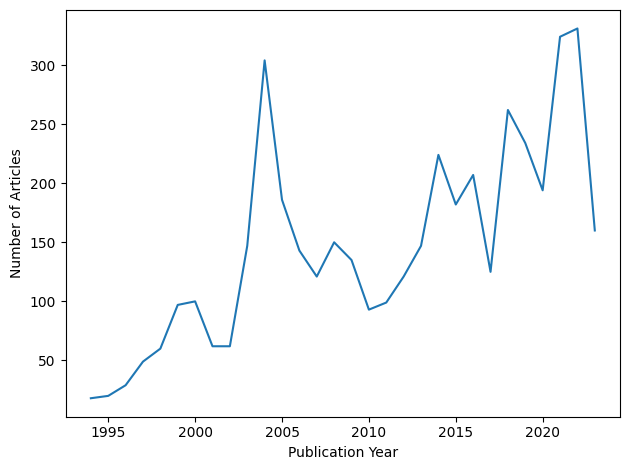

In [31]:
df['publication_year'].value_counts().sort_index().plot(legend = None)
plt.xlabel('Publication Year')
plt.ylabel('Number of Articles')
plt.savefig('../Visuals/articles_per_year.png')
plt.show()

                            OLS Regression Results                            
Dep. Variable:          article_count   R-squared:                       0.652
Model:                            OLS   Adj. R-squared:                  0.640
Method:                 Least Squares   F-statistic:                     52.55
Date:                Mon, 12 Feb 2024   Prob (F-statistic):           6.84e-08
Time:                        18:20:27   Log-Likelihood:                -162.03
No. Observations:                  30   AIC:                             328.1
Df Residuals:                      28   BIC:                             330.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -1.692e+04   2351.896  

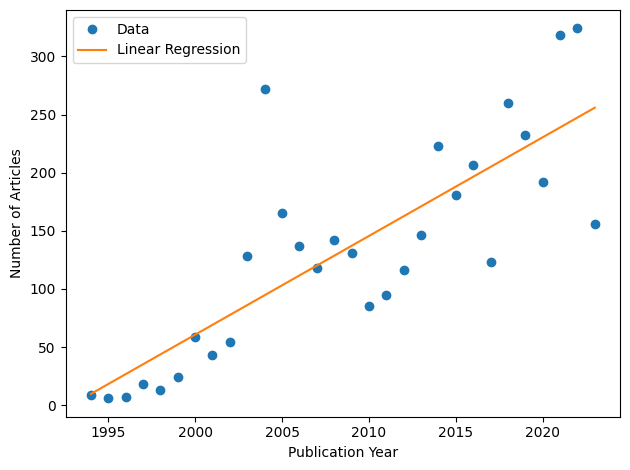

In [32]:
# Overview over yearly publications
# Calculate the number of articles published per year and add it as a column to a new dataframe
df_year = df.groupby('publication_year').count()
df_year = df_year[['title']]
df_year.columns = ['article_count']
df_year = df_year.reset_index()

# Fit a linear regression curve to the data
X = sm.add_constant(df_year['publication_year'])
y = df_year['article_count']
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

# Print the confidence intervals for the coefficients
conf_int = results.conf_int()
print("\nConfidence Intervals for the Coefficients:")
print(conf_int)

# Plot the data points and the linear regression curve
plt.plot(df_year['publication_year'], y, 'o', label='Data')
plt.plot(df_year['publication_year'], results.predict(X), label='Linear Regression')
plt.xlabel('Publication Year')
plt.ylabel('Number of Articles')
plt.legend()
plt.savefig('../Visuals/articles_per_year_regression.png')
plt.show()

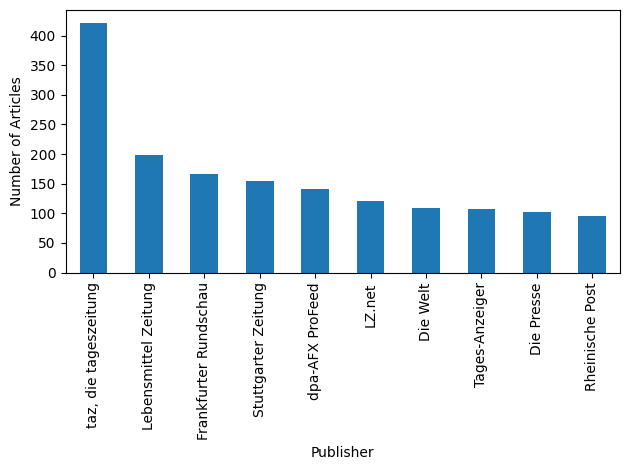

In [33]:
# Overview over publishers with most publications
df['publisher'].value_counts().nlargest(10).plot(legend = None, kind='bar',)
plt.xlabel('Publisher')
plt.ylabel('Number of Articles')
plt.savefig('../Visuals/top_10_publishers.png')
plt.show()

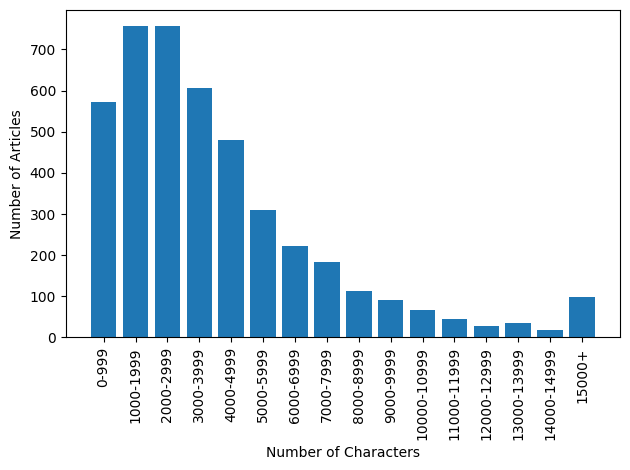

In [34]:
# Overview over articles length
# Define the intervals
intervals = [0, 1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000, 11000, 12000, 13000, 14000, 15000, float('inf')]

# Group the articles based on length intervals
grouped_articles = df.groupby(pd.cut(df['text'].str.len(), intervals)).size()

# Plot the bar plot
plt.bar(range(len(grouped_articles)), grouped_articles)

# Set the x-axis labels
plt.xticks(range(len(grouped_articles)), [f'{int(x.left)}-{int(x.right-1)}' if x.right != float('inf') else f'{int(x.left)}+' for x in grouped_articles.index], rotation=90)

# Set the x-axis label
plt.xlabel('Number of Characters')

# Set the y-axis label
plt.ylabel('Number of Articles')

# Save the plot
plt.savefig('../Visuals/articles_grouped_by_number_of_characters.png')

# Show the plot
plt.show()

                            OLS Regression Results                            
Dep. Variable:        avg_text_length   R-squared:                       0.342
Model:                            OLS   Adj. R-squared:                  0.319
Method:                 Least Squares   F-statistic:                     14.58
Date:                Mon, 12 Feb 2024   Prob (F-statistic):           0.000683
Time:                        18:20:28   Log-Likelihood:                -234.22
No. Observations:                  30   AIC:                             472.4
Df Residuals:                      28   BIC:                             475.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -9.553e+04   2.61e+04  

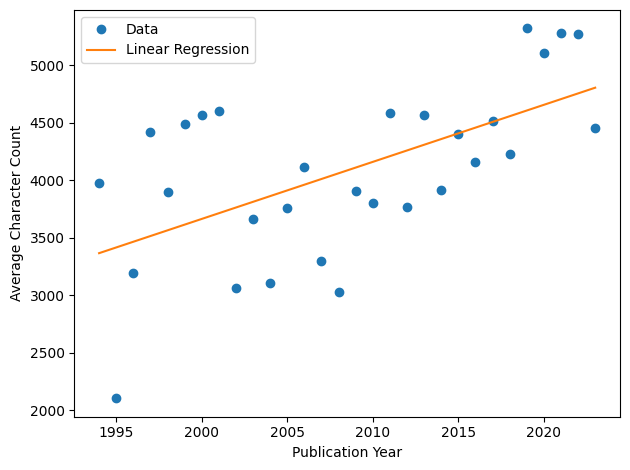

In [35]:
# Calculate the average length of text for each publication year
df_grouped = df.groupby('publication_year')['text'].apply(lambda x: x.str.len().mean()).reset_index()

# Rename the colum text to avg_text_length in the new dataframe
df_grouped.rename(columns={'text': 'avg_text_length'}, inplace=True)

# Fit a linear regression curve to the data
X = sm.add_constant(df_grouped['publication_year'])
y = df_grouped['avg_text_length']
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

# Print the confidence intervals for the coefficients
conf_int = results.conf_int()
print("\nConfidence Intervals for the Coefficients:")
print(conf_int)

# Plot the data points and the linear regression curve
plt.plot(df_grouped['publication_year'], y, 'o', label='Data')
plt.plot(df_grouped['publication_year'], results.predict(X), label='Linear Regression')
plt.xlabel('Publication Year')
plt.ylabel('Average Character Count')
plt.legend()
plt.savefig('../Visuals/yearly_text_length_characters.png')
plt.show()

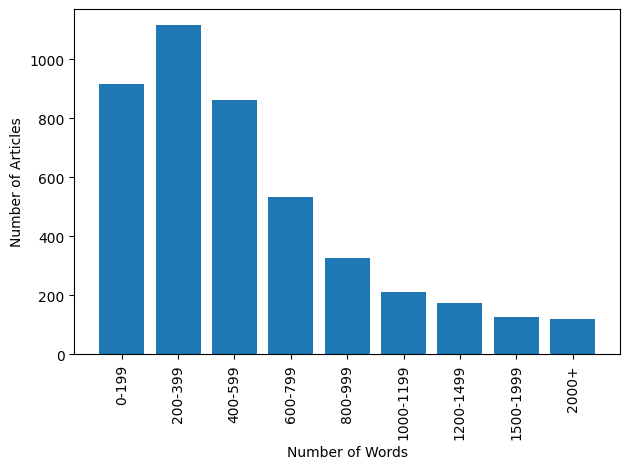

In [36]:
# Overview over articles length
# Define the intervals
intervals = [0, 200, 400, 600, 800, 1000, 1200, 1500, 2000, float('inf')]

# Group the articles based on length intervals using the column word_count
grouped_articles_word = df.groupby(pd.cut(df['word_count'], intervals)).size()

# Plot the bar plot
plt.bar(range(len(grouped_articles_word)), grouped_articles_word)

# Set the x-axis labels
plt.xticks(range(len(grouped_articles_word)), [f'{int(x.left)}-{int(x.right-1)}' if x.right != float('inf') else f'{int(x.left)}+' for x in grouped_articles_word.index], rotation=90)

# Set the x-axis label
plt.xlabel('Number of Words')

# Set the y-axis label
plt.ylabel('Number of Articles')

# Save the plot
plt.savefig('../Visuals/articles_grouped_by_number_of_words.png')

# Show the plot
plt.show()

In [37]:
# Print the average number of words per article
print(df['word_count'].mean())
# Print the number of words in the longest article
print(df['word_count'].max())
# Save the nexis_id of the longest article in a variable
longest_article = df['word_count'].idxmax()
# Print the full text, publisher and nexis_id of the longest article
print(df['publisher'][longest_article])
print(df['nexis_id'][longest_article])
print(df['text'][longest_article])
# Print the percentage of articles that have more than 1000 words
print(len(df[df['word_count'] > 1000]) / len(df))
# Print the percentage of articles that have more than 2000 words
print(len(df[df['word_count'] > 2000]) / len(df))

588.1420428636571
12136
Agrarwirtschaft 
4J4WHWW0TWTBC22D0000000
Sabine Gerlach, Achim Spiller und Christian Wocken Georg-August-Universität Göttingen 1. Trends auf dem Milchmarkt Ganz Deutschland diskutierte im Jahr 2005 über Fragen des internationalen Standortwettbewerbs und der Wettbewerbsfähigkeit, über Produktionsverlagerungen und Kostensenkungen. Ganz Deutschland? Nur die Milchwirtschaft schien davon weitgehend unberührt. Das Jahr 2005 war für die Milchbranche vornehmlich durch das Fehlen einzelner Großereignisse charakterisiert - Branchenbeobachter sprechen bereits vom Jahr der "non-events" (IDF, 2005). Zwei Begebenheiten am Jahresende lassen allerdings aufhorchen und zeigen die Richtung der weiteren Diskussion. Zum einen werden Ergebnisse eines Gutachtens im Auftrag des Raiffeisenverbandes bekannt, in dem eine radikale Strukturreform der genossenschaftlichen Molkereien gefordert wird: der Zusammenschluss zu wenigen Großmolkereien, der Kauf einer größeren Privatmolkerei, Standor

                            OLS Regression Results                            
Dep. Variable:        avg_text_length   R-squared:                       0.411
Model:                            OLS   Adj. R-squared:                  0.390
Method:                 Least Squares   F-statistic:                     19.56
Date:                Mon, 12 Feb 2024   Prob (F-statistic):           0.000134
Time:                        18:20:28   Log-Likelihood:                -174.17
No. Observations:                  30   AIC:                             352.3
Df Residuals:                      28   BIC:                             355.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -1.503e+04   3524.611  

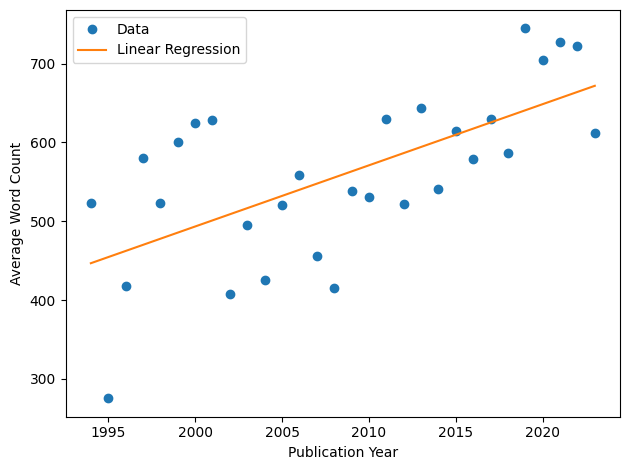

In [38]:
# Calculate the average length of text for each publication year using the column word_count
df_grouped_word = df.groupby('publication_year')['word_count'].apply(lambda x: x.mean()).reset_index()

# Rename the colum word_count to avg_text_length in the new dataframe
df_grouped_word.rename(columns={'word_count': 'avg_text_length'}, inplace=True)

# Fit a linear regression curve to the data
X = sm.add_constant(df_grouped_word['publication_year'])
y = df_grouped_word['avg_text_length']
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

# Print the confidence intervals for the coefficients
conf_int = results.conf_int()
print("\nConfidence Intervals for the Coefficients:")
print(conf_int)

# Plot the data points and the linear regression curve
plt.plot(df_grouped_word['publication_year'], y, 'o', label='Data')
plt.plot(df_grouped_word['publication_year'], results.predict(X), label='Linear Regression')
plt.xlabel('Publication Year')
plt.ylabel('Average Word Count')
plt.legend()
plt.savefig('../Visuals/yearly_text_length_words.png')
plt.show()

### Frequent words

In [39]:
# Use small spacy model
nlp = spacy.load("de_core_news_sm")

# Add a column with the spacy doc object for each article
df['spacy_doc'] = df['text'].apply(nlp)

spacy_doc
Lebensmittel    5779
Fleisch         5508
Produkt         4977
gentechnisch    4130
Mensch          3975
Unternehmen     3569
verändert       3261
Deutschland     3198
USA             3066
Gentechnik      3001
stehen          2836
sehen           2738
Tier            2737
deutsch         2349
EU              2346
Pflanze         2336
Markt           2301
Verbraucher     2264
finden          2186
Europa          2167
Name: count, dtype: int64


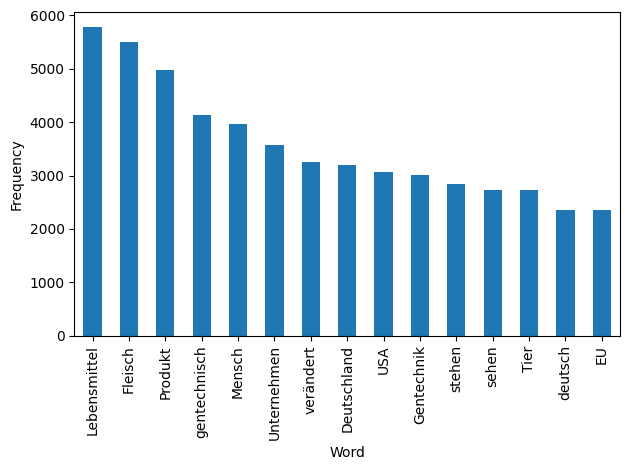

In [40]:
ignore_word_list = ["Prozent"]

# Find the most frequent words in df and their frequencies
word_freq = df['spacy_doc'].apply(lambda x: [token.lemma_ for token in x if not token.is_stop and not token.is_punct and not token.is_digit and not token.lemma_ in ignore_word_list]).explode().value_counts()
#word_freq = df['spacy_doc'].apply(lambda x: [token.lemma_ for token in x]).explode().value_counts()

# Remove whitespace-only strings
word_freq = word_freq[word_freq.index.str.strip() != '']

# Remove double lines
word_freq = word_freq[word_freq.index.str.strip() != '--']

# Workaround: Remove all texts where the words "and", "the", "to" and "of" appear more than twice.
# No longer needed since all non-german articles have been removed
#word_freq = word_freq[(word_freq.index != 'and') & (word_freq.index != 'the') & (word_freq.index != 'The') & (word_freq.index != 'to') & (word_freq.index != 'of')]
#word_freq = word_freq[word_freq > 2]

# Print the most frequent words as text
print(word_freq.nlargest(20))

# Plot the 15 most frequent words
word_freq.nlargest(15).plot(kind='bar')
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.savefig('../Visuals/top_15_words.png')
plt.show()

In [41]:
# Find the texts with the most occurences of "Prozent"
df['prozent_count'] = df['spacy_doc'].apply(lambda x: sum([1 for token in x if token.lemma_ == 'Prozent']))
df['prozent_count'].nlargest(10)

# Print the texts with the most occurences of "Prozent", the frequency of the word "Prozent" and the publisher of the article
for i in df['prozent_count'].nlargest(50).index:
    print(df.loc[i]['publisher'])
    print(df.loc[i]['title'])
    print(df.loc[i]['text'])
    print(df.loc[i]['prozent_count'])
    print('------------------------')

print()

print(str(sum(df['prozent_count'] > 5)) + ' Artikel mit mehr als 5 Vorkommen von Prozent')
print(str(sum(df['prozent_count'] > 50)) + ' Artikel mit mehr als 50 Vorkommen von Prozent')


LZ.net
Marktplatz New Food: Preis für pflanzenbasierte Produkte muss sinken
Vegetarische und vegane Alternativen zu Fleisch-, Fisch- und Milchprodukten sind ein anhaltender Trend Dennoch wird leicht übersehen, dass sie noch nicht im Mainstream angekommen sind. Das liegt auch am Preis. YouGov hat exklusiv für die LZ über 2000 Verbraucher Anfang Juli zu Konsum und Präferenzen befragt. 56 Prozent der Befragten haben in den letzten Monaten keine pflanzenbasierten Lebensmittel eingekauft. Weitere 15 Prozent haben lediglich bis zu zwei Einkäufe getätigt. Die Schar der regelmäßigen Verwender ist mit 12 Prozent noch sehr überschaubar. Sie legen diese Produkte wöchentlich in ihren Einkaufskorb. Natürlich stellt sich die Frage, was verbessert werden muss, damit die Produkte mehr Anklang finden. Optimierungsbedarf sehen die Befragten nicht vorrangig beim Thema Bioqualität (23 Prozent) oder Struktur und Biss (14 Prozent), sondern beim Preis. Sie sind schlicht zu teuer. Die einfache Forderung: Alte

In [42]:
# Visualize the distribution of the number of occurences of "gentechnich" or "Gentechnik" in the articles over the years
df['gentechnik_count'] = df['spacy_doc'].apply(lambda x: sum([1 for token in x if token.lemma_ == 'Gentechnik']))
df['gentechnik_count'] += df['spacy_doc'].apply(lambda x: sum([1 for token in x if token.lemma_ == 'gentechnisch']))

# Introduce a new column "gentechnik_bool" which is True if the article contains the word "gentechnich" or "Gentechnik" and False otherwise
df['gentechnik_bool'] = df['gentechnik_count'] > 0

# Group by year and calculate the total number of occurences for each year
df_gentechnik = df.groupby('publication_year')['gentechnik_count'].sum().reset_index()

# Calculate the ratio of "gentechnich" or "Gentechnik" over the number of words in the articles over the years
df_gentechnik['gentechnik_ratio'] = df_gentechnik['gentechnik_count'] / df.groupby('publication_year')['text'].apply(lambda x: sum([len(token) for token in x])).reset_index()['text']

# Calculate the ratio of articles containing "gentechnich" or "Gentechnik" over the years
df_gentechnik['gentechnik_bool_ratio'] = df.groupby('publication_year')['gentechnik_bool'].mean().reset_index()['gentechnik_bool']

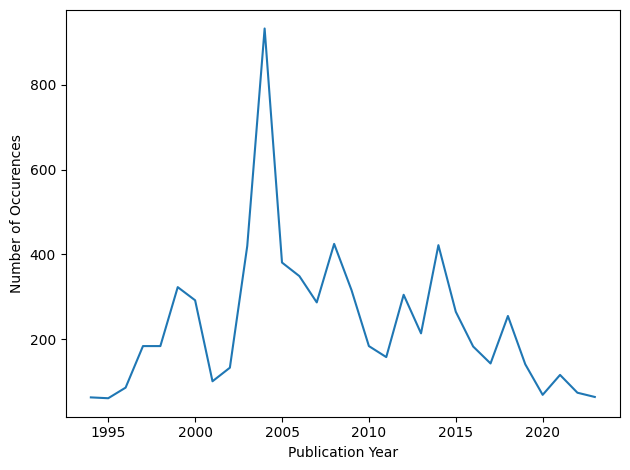

In [43]:
# Visualize the column "gentechnik_count"
df_gentechnik.plot(x='publication_year', y='gentechnik_count', legend=None)
plt.xlabel('Publication Year')
plt.ylabel('Number of Occurences')
plt.savefig('../Visuals/gentechnik_count.png')
plt.show()

                            OLS Regression Results                            
Dep. Variable:       gentechnik_ratio   R-squared:                       0.736
Model:                            OLS   Adj. R-squared:                  0.726
Method:                 Least Squares   F-statistic:                     77.94
Date:                Mon, 12 Feb 2024   Prob (F-statistic):           1.40e-09
Time:                        18:24:06   Log-Likelihood:                 217.63
No. Observations:                  30   AIC:                            -431.3
Df Residuals:                      28   BIC:                            -428.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0668      0.008  

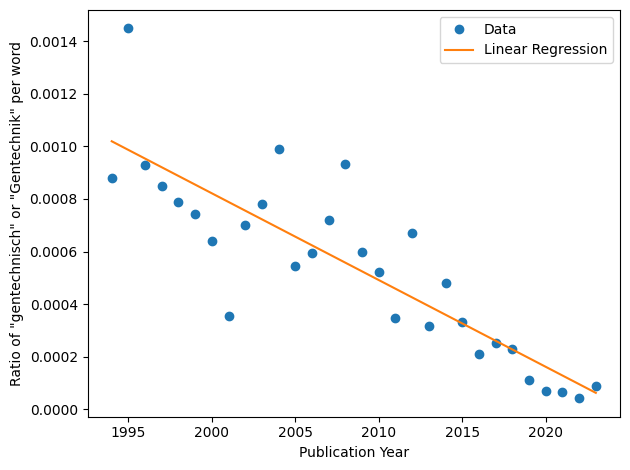

In [44]:
# Visualize the column "gentechnik_ratio"
# Fit a linear regression curve to the data
X = sm.add_constant(df_gentechnik['publication_year'])
y = df_gentechnik['gentechnik_ratio']
model = sm.OLS(y.astype(float), X.astype(float))
results = model.fit()
print(results.summary())

# Print the confidence intervals for the coefficients
conf_int = results.conf_int()
print("\nConfidence Intervals for the Coefficients:")
print(conf_int)

# Plot the data points and the linear regression curve
plt.plot(df_gentechnik['publication_year'], y, 'o', label='Data')
plt.plot(df_gentechnik['publication_year'], results.predict(X), label='Linear Regression')
plt.xlabel('Publication Year')
plt.ylabel('Ratio of "gentechnisch" or "Gentechnik" per word')
plt.legend()
plt.savefig('../Visuals/gentechnik_ratio.png')
plt.show()

                              OLS Regression Results                             
Dep. Variable:     gentechnik_bool_ratio   R-squared:                       0.844
Model:                               OLS   Adj. R-squared:                  0.839
Method:                    Least Squares   F-statistic:                     152.0
Date:                   Mon, 12 Feb 2024   Prob (F-statistic):           7.84e-13
Time:                           18:24:06   Log-Likelihood:                 29.202
No. Observations:                     30   AIC:                            -54.40
Df Residuals:                         28   BIC:                            -51.60
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const     

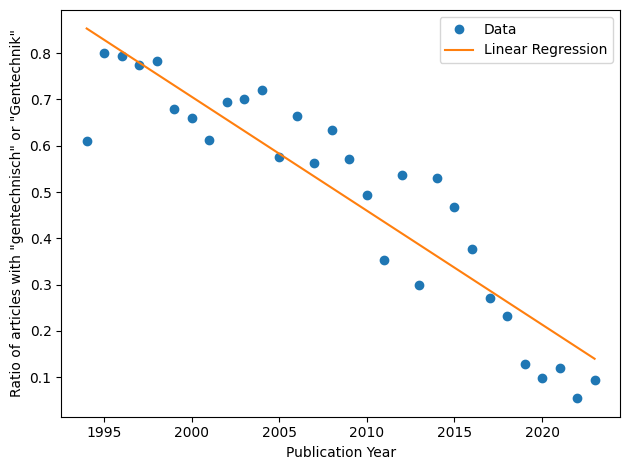

In [45]:
# Visualize the column "gentechnik_bool_ratio"
# Fit a linear regression curve to the data
X = sm.add_constant(df_gentechnik['publication_year'])
y = df_gentechnik['gentechnik_bool_ratio']
model = sm.OLS(y.astype(float), X.astype(float))
results = model.fit()
print(results.summary())

# Print the confidence intervals for the coefficients
conf_int = results.conf_int()
print("\nConfidence Intervals for the Coefficients:")
print(conf_int)

# Plot the data points and the linear regression curve
plt.plot(df_gentechnik['publication_year'], y, 'o', label='Data')
plt.plot(df_gentechnik['publication_year'], results.predict(X), label='Linear Regression')
plt.xlabel('Publication Year')
plt.ylabel('Ratio of articles with "gentechnisch" or "Gentechnik"')
plt.legend()
plt.savefig('../Visuals/gentechnik_bool_ratio.png')
plt.show()

### Questions

In [46]:
def count_questions(text):
    return sum(1 for sent in text.sents if sent.text.strip().endswith('?'))

In [47]:
df['questions_count'] = df["spacy_doc"].apply(count_questions)

In [48]:
# Add a column with the number of characters in the text
df['characters_count'] = df['text'].str.len()

# Add a column with the ratio of questions to characters
df['questions_ratio'] = df['questions_count'] / df['characters_count']

In [49]:
df
df_sorted = df.sort_values(by='questions_ratio', ascending=False)
df_sorted

,nexis_id,title,publication_date,publication_year,publisher,text,clean_text,word_count,spacy_doc,prozent_count,gentechnik_count,gentechnik_bool,questions_count,characters_count,questions_ratio
3649,67DH39P1JC8114CH0000000,"Vegan, aber ?Fleischerei??",2023-01-27,2023,Sächsische Zeitung Regionalausgaben,Schnitzel- und Fleischkäsebrötchen auf die Han...,schnitzel und fleischkäsebrötchen auf der hand...,583,"(Schnitzel-, und, Fleischkäsebrötchen, auf, di...",0,0,False,41,4195,0.009774
395,5WWBF9D1F07YK01F0000000,FOOD-NEWS,2019-08-22,2019,Bunte,Wurst- und Fleisch-alternativen EVENTLOCATION ...,wurst und fleischalternativen eventlocation in...,11,"(Wurst-, und, Fleisch-alternativen, EVENTLOCAT...",0,0,False,1,108,0.009259
654,5S2T9DY1JCTWB3T40000000,1 Essen nach maß 30 31 38 41,2018-04-11,2018,Der Standard,19 24 Mythen im Faktencheck Was bringen Detox-...,19 24 mythos in faktencheck was bringen detoxf...,15,"(19, 24, Mythen, im, Faktencheck, Was, bringen...",0,0,False,1,108,0.009259
779,7XMCMWY12RKCK2JP0000000,Der Mai ist nicht gekommen Von Harald Martenstein,2010-01-24,2010,Der Tagesspiegel,Im Mai wird die Sonne scheinen - ganz bestimmt...,in mai werden der sonne scheinen ganz bestim...,383,"(Im, Mai, wird, die, Sonne, scheinen, -, ganz,...",0,0,False,20,2371,0.008435
4378,5NV18G31F15WB0890000000,FORSCHUNG & TECHNIK,2017-06-20,2017,ZEIT Wissen,"Tanker, Frachter, Piraten: Auf dem Meer ist wa...",tanker frachter pirat auf der meer sein was lo...,295,"(Tanker, ,, Frachter, ,, Piraten, :, Auf, dem,...",0,0,False,14,1918,0.007299
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2360,4M5VTM20TXJ6D2GR0000000,Genfood: Umfrage von Greenpeace,2003-07-02,2003,LZ.net,LZ|NET/hed. Das Europäische Parlament verabsch...,lznethed der europäisch parlament verabschiede...,229,"(LZ|NET, /, hed, ., Das, Europäische, Parlamen...",0,4,True,0,1763,0.000000
2361,4M5VTM20TXJ6D3980000000,Gen-Technik: Gesetz verabschiedet,2004-05-06,2004,LZ.net,LZ|NET/dpa. Nach monatelangem Streit hat der B...,lznetdpa nach monatelang streit haben der bund...,66,"(LZ|NET, /, dpa, ., Nach, monatelangem, Streit...",0,2,True,0,511,0.000000
2362,4M5VTM30TXJ6D1X90000000,Gen-Produkte: WTO gibt Klägern Recht,2006-02-08,2006,LZ.net,LZ|NET/dpa. Die Welthandelsorganisation (WTO) ...,lznetdpa der welthandelsorganisation wto haben...,198,"(LZ|NET, /, dpa, ., Die, Welthandelsorganisati...",0,3,True,0,1513,0.000000
2363,4M5VTM30TXJ6D2540000000,Gentechnik: Strafmaß ist umstritten,2004-03-09,2004,LZ.net,LZ|NET/dpa. Die von der Bundesregierung geplan...,lznetdpa der von der bundesregierung geplant s...,216,"(LZ|NET, /, dpa, ., Die, von, der, Bundesregie...",0,3,True,0,1826,0.000000


                            OLS Regression Results                            
Dep. Variable:        questions_ratio   R-squared:                       0.388
Model:                            OLS   Adj. R-squared:                  0.366
Method:                 Least Squares   F-statistic:                     17.73
Date:                Mon, 12 Feb 2024   Prob (F-statistic):           0.000238
Time:                        18:24:08   Log-Likelihood:                -19.738
No. Observations:                  30   AIC:                             43.48
Df Residuals:                      28   BIC:                             46.28
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const              -84.6878     20.488  

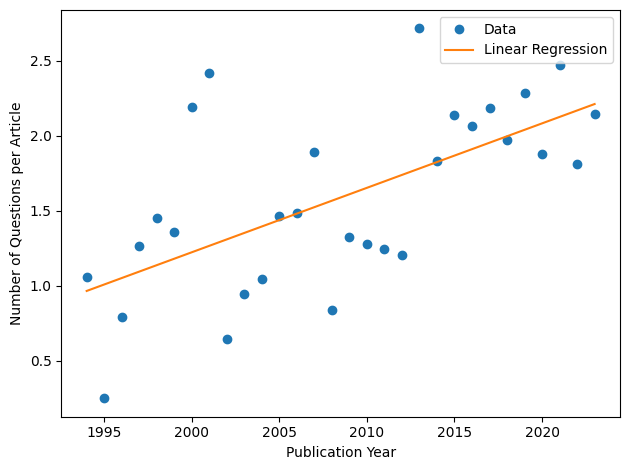

In [50]:
# Visualize the number of questions per article per year and fit a linear regression curve to the data
# Group by year and calculate the total number of questions and total number of articles for each year
df_grouped = df.groupby('publication_year').agg({'questions_count': 'sum', 'text': 'count'})

# Calculate the ratio of questions to total articles for each year
df_grouped['questions_ratio'] = df_grouped['questions_count'] / df_grouped['text']

# Make the index a column
df_grouped.reset_index(inplace=True)

# Fit a linear regression curve to the data
X = sm.add_constant(df_grouped['publication_year'])
y = df_grouped['questions_ratio']
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

# Print the confidence intervals for the coefficients
conf_int = results.conf_int()
print("\nConfidence Intervals for the Coefficients:")
print(conf_int)

# Plot the data points and the linear regression curve
plt.plot(df_grouped['publication_year'], y, 'o', label='Data')
plt.plot(df_grouped['publication_year'], results.predict(X), label='Linear Regression')
plt.xlabel('Publication Year')
plt.ylabel('Number of Questions per Article')
plt.legend()
plt.savefig('../Visuals/questions_ratio_per_text.png')
plt.show()

                            OLS Regression Results                            
Dep. Variable:        questions_ratio   R-squared:                       0.270
Model:                            OLS   Adj. R-squared:                  0.244
Method:                 Least Squares   F-statistic:                     10.35
Date:                Mon, 12 Feb 2024   Prob (F-statistic):            0.00326
Time:                        18:24:08   Log-Likelihood:                 235.08
No. Observations:                  30   AIC:                            -466.2
Df Residuals:                      28   BIC:                            -463.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.0131      0.004  

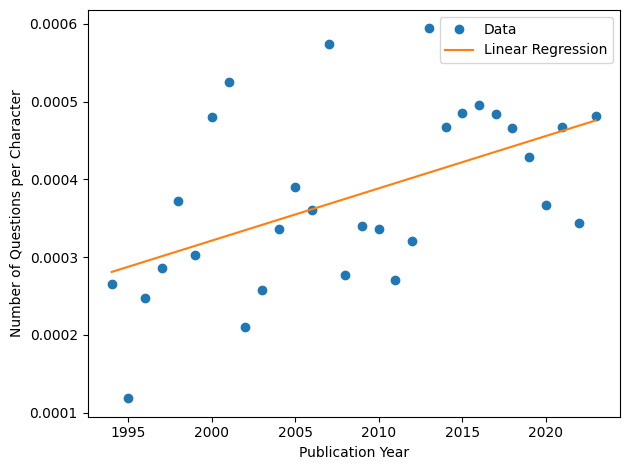

In [51]:
# Visualize the ratio of questions to characters per year and fit a linear regression curve to the data
# Group by year and calculate the total number of questions and total number of characters for each year
df_grouped = df.groupby('publication_year').agg({'questions_count': 'sum', 'characters_count': 'sum'})

# Calculate the ratio of questions to total characters for each year
df_grouped['questions_ratio'] = df_grouped['questions_count'] / df_grouped['characters_count']

# Make the index a column
df_grouped.reset_index(inplace=True)

# Fit a linear regression curve to the data
X = sm.add_constant(df_grouped['publication_year'])
y = df_grouped['questions_ratio']
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

# Print the confidence intervals for the coefficients
conf_int = results.conf_int()
print("\nConfidence Intervals for the Coefficients:")
print(conf_int)

# Plot the data points and the linear regression curve
plt.plot(df_grouped['publication_year'], y, 'o', label='Data')
plt.plot(df_grouped['publication_year'], results.predict(X), label='Linear Regression')
plt.xlabel('Publication Year')
plt.ylabel('Number of Questions per Character')
plt.legend()
plt.savefig('../Visuals/questions_ratio_per_character.png')
plt.show()

### Pronouns with spacy

In [52]:
#df = pd.read_pickle("../Data/df_full.pkl")

# Use small spacy model
nlp = spacy.load('de_core_news_sm')

df

,nexis_id,title,publication_date,publication_year,publisher,text,clean_text,word_count,spacy_doc,prozent_count,gentechnik_count,gentechnik_bool,questions_count,characters_count,questions_ratio
0,5MNMH621JB0GF09H0000000,Angst vor dem «harten Brexit» auf der Insel - ...,2017-01-15,2017,AP Deutsch,Wenn Großbritannien Ende März den Ausstieg aus...,wenn großbritannien ende märz der ausstieg aus...,763,"(Wenn, Großbritannien, Ende, März, den, Aussti...",7,0,False,1,5529,0.000181
1,5SM3THB1DXFJ50MP0000000,Fleischindustrie wehrt sich gegen Marketing fü...,2018-06-21,2018,AP Deutsch,Fleisch aus dem Labor ist noch eine Zukunftsvi...,fleisch aus der labor sein noch ein zukunftsvi...,708,"(Fleisch, aus, dem, Labor, ist, noch, eine, Zu...",0,0,False,0,5177,0.000000
2,5SM3THB1DXFJ50MY0000000,Der AP-Überblick am Nachmittag,2018-06-21,2018,AP Deutsch,Die AP Weltnachrichten haben heute unter ander...,der ap weltnachrichten haben heute unter ander...,632,"(Die, AP, Weltnachrichten, haben, heute, unter...",0,0,False,0,4622,0.000000
3,5STNVWH1DXFJ53VM0000000,Laborfleisch soll in drei Jahren auf die Telle...,2018-07-17,2018,AP Deutsch,Maastricht (AP) - Das niederländische Unterneh...,maastricht ap der niederländisch unternehmen...,225,"(Maastricht, (, AP, ), -, Das, niederländische...",0,0,False,0,1575,0.000000
4,5VHK2XG1JB0GF4Y50000000,Israelische Forscher wollen künstliche Steaks ...,2019-02-26,2019,AP Deutsch,"Die Weltbevölkerung wächst, die Nachfrage nach...",der weltbevölkerung wachsen der nachfrage nach...,631,"(Die, Weltbevölkerung, wächst, ,, die, Nachfra...",2,0,False,0,4588,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4381,67KW1VK1F15WB4660000000,Kein Titel,2023-02-21,2023,ZEIT Wissen,6 Am anfang drei Fragen 1. Können wir andere m...,6 an anfang drei frage 1 können wir anderer mi...,305,"(6, Am, anfang, drei, Fragen, 1., Können, wir,...",0,0,False,12,1866,0.006431
4382,67KW1VK1F15WB46B0000000,Leben und schmecken lassen,2023-02-21,2023,ZEIT Wissen,"Ein saftiges Filet, für das kein Huhn sterben ...",ein saftig filet für der kein huhn sterben mus...,266,"(Ein, saftiges, Filet, ,, für, das, kein, Huhn...",0,0,False,0,1849,0.000000
4383,7W29GN20YC2460S30000000,ABSCHIED VOM ALTEN ITALIEN,2009-05-13,2009,ZEIT Wissen,John Dickie: »Delizia! Die Italiener und ihre...,john dickie delizia der italiener und ihr kü...,912,"(John, Dickie, :, », Delizia, !, Die, Italiene...",0,0,False,2,6061,0.000330
4384,7X8DW4712SK2G0H10000000,Essen aus dem Labor,2009-12-08,2009,ZEIT Wissen,Es ist der letzte Tag auf der Lebensmittelmess...,es sein der letzter tag auf der lebensmittelme...,2548,"(Es, ist, der, letzte, Tag, auf, der, Lebensmi...",3,2,True,8,18345,0.000436


In [53]:
# Add four new columns to the dataframe called 'word_count', 'du_count', 'ihr_count', 'du_ihr_count'
df['word_count'] = 0
df['du_count'] = 0
df['ihr_count'] = 0
df['du_ihr_count'] = 0

# Add three new columns to the dataframe called 'has_du', 'has_ihr' and 'has_du_ihr'
df['has_du'] = False
df['has_ihr'] = False
df['has_du_ihr'] = False

# Define the variants of 'Du' and 'Ihr'
du_variants = ['du', 'dich', 'dein', 'deine', 'deines', 'deiner', 'dir']
ihr_variants = ['ihr', 'euch', 'euer', 'eure', 'eures', 'eurer', 'eur']

# Iterate over the dataframe and count the number of words, 'Du', 'Ihr' and 'Du' and 'Ihr' in each text
for index in df.index:
    doc = nlp(df['clean_text'][index])
    df.loc[index, 'word_count'] = len(doc)
    df.loc[index, 'du_count'] = sum([1 for token in doc if token.text in du_variants])
    df.loc[index, 'ihr_count'] = sum([1 for token in doc if token.text in ihr_variants])
    df.loc[index, 'du_ihr_count'] = df.loc[index, 'du_count'] + df.loc[index, 'ihr_count']

    # Fill the columns 'has_du', 'has_ihr' and 'has_du_ihr' with True if the text contains 'Du', 'Ihr' or 'Du' and 'Ihr'
    if df.loc[index, 'du_count'] > 0:
        df.loc[index, 'has_du'] = True
    if df.loc[index, 'ihr_count'] > 0:
        df.loc[index, 'has_ihr'] = True
    if df.loc[index, 'du_ihr_count'] > 0:
        df.loc[index, 'has_du_ihr'] = True

df

,nexis_id,title,publication_date,publication_year,publisher,text,clean_text,word_count,spacy_doc,prozent_count,...,gentechnik_bool,questions_count,characters_count,questions_ratio,du_count,ihr_count,du_ihr_count,has_du,has_ihr,has_du_ihr
0,5MNMH621JB0GF09H0000000,Angst vor dem «harten Brexit» auf der Insel - ...,2017-01-15,2017,AP Deutsch,Wenn Großbritannien Ende März den Ausstieg aus...,wenn großbritannien ende märz der ausstieg aus...,763,"(Wenn, Großbritannien, Ende, März, den, Aussti...",7,...,False,1,5529,0.000181,0,5,5,False,True,True
1,5SM3THB1DXFJ50MP0000000,Fleischindustrie wehrt sich gegen Marketing fü...,2018-06-21,2018,AP Deutsch,Fleisch aus dem Labor ist noch eine Zukunftsvi...,fleisch aus der labor sein noch ein zukunftsvi...,708,"(Fleisch, aus, dem, Labor, ist, noch, eine, Zu...",0,...,False,0,5177,0.000000,0,1,1,False,True,True
2,5SM3THB1DXFJ50MY0000000,Der AP-Überblick am Nachmittag,2018-06-21,2018,AP Deutsch,Die AP Weltnachrichten haben heute unter ander...,der ap weltnachrichten haben heute unter ander...,632,"(Die, AP, Weltnachrichten, haben, heute, unter...",0,...,False,0,4622,0.000000,0,4,4,False,True,True
3,5STNVWH1DXFJ53VM0000000,Laborfleisch soll in drei Jahren auf die Telle...,2018-07-17,2018,AP Deutsch,Maastricht (AP) - Das niederländische Unterneh...,maastricht ap der niederländisch unternehmen...,225,"(Maastricht, (, AP, ), -, Das, niederländische...",0,...,False,0,1575,0.000000,0,0,0,False,False,False
4,5VHK2XG1JB0GF4Y50000000,Israelische Forscher wollen künstliche Steaks ...,2019-02-26,2019,AP Deutsch,"Die Weltbevölkerung wächst, die Nachfrage nach...",der weltbevölkerung wachsen der nachfrage nach...,631,"(Die, Weltbevölkerung, wächst, ,, die, Nachfra...",2,...,False,0,4588,0.000000,0,0,0,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4381,67KW1VK1F15WB4660000000,Kein Titel,2023-02-21,2023,ZEIT Wissen,6 Am anfang drei Fragen 1. Können wir andere m...,6 an anfang drei frage 1 können wir anderer mi...,305,"(6, Am, anfang, drei, Fragen, 1., Können, wir,...",0,...,False,12,1866,0.006431,1,1,2,True,True,True
4382,67KW1VK1F15WB46B0000000,Leben und schmecken lassen,2023-02-21,2023,ZEIT Wissen,"Ein saftiges Filet, für das kein Huhn sterben ...",ein saftig filet für der kein huhn sterben mus...,266,"(Ein, saftiges, Filet, ,, für, das, kein, Huhn...",0,...,False,0,1849,0.000000,0,0,0,False,False,False
4383,7W29GN20YC2460S30000000,ABSCHIED VOM ALTEN ITALIEN,2009-05-13,2009,ZEIT Wissen,John Dickie: »Delizia! Die Italiener und ihre...,john dickie delizia der italiener und ihr kü...,912,"(John, Dickie, :, », Delizia, !, Die, Italiene...",0,...,False,2,6061,0.000330,0,6,6,False,True,True
4384,7X8DW4712SK2G0H10000000,Essen aus dem Labor,2009-12-08,2009,ZEIT Wissen,Es ist der letzte Tag auf der Lebensmittelmess...,es sein der letzter tag auf der lebensmittelme...,2548,"(Es, ist, der, letzte, Tag, auf, der, Lebensmi...",3,...,True,8,18345,0.000436,0,12,12,False,True,True


In [54]:
df_yearly_overview = pd.DataFrame(columns=['publication_year', 'publication_count', 'word_count', 'du_count', 'ihr_count', 'du_ihr_count'])

# Fill the dataframe with the data
for index in df.index:
    year = df["publication_year"][index]
    if year not in df_yearly_overview['publication_year'].values:
        df_yearly_overview = pd.concat([df_yearly_overview, pd.DataFrame({'publication_year': year, 'publication_count': 0, 'word_count': 0, 'du_count': 0, 'ihr_count': 0, 'du_ihr_count': 0}, index=[0])])
    df_yearly_overview.loc[df_yearly_overview['publication_year'] == year, 'publication_count'] += 1
    df_yearly_overview.loc[df_yearly_overview['publication_year'] == year, 'word_count'] += df["word_count"][index]
    df_yearly_overview.loc[df_yearly_overview['publication_year'] == year, 'du_count'] += df["du_count"][index]
    df_yearly_overview.loc[df_yearly_overview['publication_year'] == year, 'ihr_count'] += df["ihr_count"][index]
    df_yearly_overview.loc[df_yearly_overview['publication_year'] == year, 'du_ihr_count'] += df["du_ihr_count"][index]

# Sort the dataframe by publication_year
df_yearly_overview = df_yearly_overview.sort_values(by='publication_year')

# Reindex the dataframe
df_yearly_overview = df_yearly_overview.reset_index(drop=True)

df_yearly_overview

,publication_year,publication_count,word_count,du_count,ihr_count,du_ihr_count
0,1994,18,9408,0,59,59
1,1995,20,5510,2,25,27
2,1996,29,12124,0,27,27
3,1997,49,28409,0,86,86
4,1998,60,31397,18,103,121
5,1999,97,58204,4,220,224
6,2000,100,62409,8,268,276
7,2001,62,38951,14,166,180
8,2002,62,25265,1,98,99
9,2003,147,72885,3,323,326


In [55]:
# Add newcolumns to the dataframe called 'articles_with_du_count', 'articles_without_du_count', 'articles_with_ihr_count', 'articles_without_ihr_count', 'articles_with_du_ihr_count', 'articles_without_du_ihr_count'
df_yearly_overview['articles_with_du_count'] = 0
df_yearly_overview['articles_without_du_count'] = 0
df_yearly_overview['articles_with_ihr_count'] = 0
df_yearly_overview['articles_without_ihr_count'] = 0
df_yearly_overview['articles_with_du_ihr_count'] = 0
df_yearly_overview['articles_without_du_ihr_count'] = 0

# Iterate over df and count the number of articles with and without 'Du' in each year and fill the data into df_yearly_overview
for index in df.index:
    year = df["publication_year"][index]
    if df["has_du"][index]:
        df_yearly_overview.loc[df_yearly_overview['publication_year'] == year, 'articles_with_du_count'] += 1
    else:
        df_yearly_overview.loc[df_yearly_overview['publication_year'] == year, 'articles_without_du_count'] += 1
    if df["has_ihr"][index]:
        df_yearly_overview.loc[df_yearly_overview['publication_year'] == year, 'articles_with_ihr_count'] += 1
    else:
        df_yearly_overview.loc[df_yearly_overview['publication_year'] == year, 'articles_without_ihr_count'] += 1
    if df["has_du_ihr"][index]:
        df_yearly_overview.loc[df_yearly_overview['publication_year'] == year, 'articles_with_du_ihr_count'] += 1
    else:
        df_yearly_overview.loc[df_yearly_overview['publication_year'] == year, 'articles_without_du_ihr_count'] += 1

# Add new columns to the dataframe df_yearly_overview called 'articles_with_du_ratio', 'articles_with_ihr_ratio', 'articles_with_du_ihr_ratio'
df_yearly_overview['articles_with_du_ratio'] = 0
df_yearly_overview['articles_with_ihr_ratio'] = 0
df_yearly_overview['articles_with_du_ihr_ratio'] = 0

# Calculate the ratios and fill the data into df_yearly_overview
for index in df_yearly_overview.index:
    df_yearly_overview.loc[index, 'articles_with_du_ratio'] = df_yearly_overview.loc[index, 'articles_with_du_count'] / df_yearly_overview.loc[index, 'publication_count']
    df_yearly_overview.loc[index, 'articles_with_ihr_ratio'] = df_yearly_overview.loc[index, 'articles_with_ihr_count'] / df_yearly_overview.loc[index, 'publication_count']
    df_yearly_overview.loc[index, 'articles_with_du_ihr_ratio'] = df_yearly_overview.loc[index, 'articles_with_du_ihr_count'] / df_yearly_overview.loc[index, 'publication_count']

df_yearly_overview

,publication_year,publication_count,word_count,du_count,ihr_count,du_ihr_count,articles_with_du_count,articles_without_du_count,articles_with_ihr_count,articles_without_ihr_count,articles_with_du_ihr_count,articles_without_du_ihr_count,articles_with_du_ratio,articles_with_ihr_ratio,articles_with_du_ihr_ratio
0,1994,18,9408,0,59,59,0,18,11,7,11,7,0.000000,0.611111,0.611111
1,1995,20,5510,2,25,27,1,19,10,10,11,9,0.050000,0.500000,0.550000
2,1996,29,12124,0,27,27,0,29,14,15,14,15,0.000000,0.482759,0.482759
3,1997,49,28409,0,86,86,0,49,31,18,31,18,0.000000,0.632653,0.632653
4,1998,60,31397,18,103,121,3,57,36,24,36,24,0.050000,0.600000,0.600000
5,1999,97,58204,4,220,224,4,93,61,36,61,36,0.041237,0.628866,0.628866
6,2000,100,62409,8,268,276,5,95,78,22,78,22,0.050000,0.780000,0.780000
7,2001,62,38951,14,166,180,6,56,36,26,37,25,0.096774,0.580645,0.596774
8,2002,62,25265,1,98,99,1,61,39,23,39,23,0.016129,0.629032,0.629032
9,2003,147,72885,3,323,326,2,145,104,43,104,43,0.013605,0.707483,0.707483


In [56]:
# Calculate the ratio of count_du to total publications for each year
df_yearly_overview['du_ratio_per_article'] = df_yearly_overview['du_count'] / df_yearly_overview['publication_count']

# Calculate the ratio of count_ihr to total publications for each year
df_yearly_overview['ihr_ratio_per_article'] = df_yearly_overview['ihr_count'] / df_yearly_overview['publication_count']

# Calculate the ratio of count_du_ihr to total publications for each year
df_yearly_overview['du_ihr_ratio_per_article'] = df_yearly_overview['du_ihr_count'] / df_yearly_overview['publication_count']

# Calculate the ratio of count_du to total words for each year
df_yearly_overview['du_ratio_per_word'] = df_yearly_overview['du_count'] / df_yearly_overview['word_count']

# Calculate the ratio of count_ihr to total words for each year
df_yearly_overview['ihr_ratio_per_word'] = df_yearly_overview['ihr_count'] / df_yearly_overview['word_count']

# Calculate the ratio of count_du_ihr to total words for each year
df_yearly_overview['du_ihr_ratio_per_word'] = df_yearly_overview['du_ihr_count'] / df_yearly_overview['word_count']

df_yearly_overview

,publication_year,publication_count,word_count,du_count,ihr_count,du_ihr_count,articles_with_du_count,articles_without_du_count,articles_with_ihr_count,articles_without_ihr_count,...,articles_without_du_ihr_count,articles_with_du_ratio,articles_with_ihr_ratio,articles_with_du_ihr_ratio,du_ratio_per_article,ihr_ratio_per_article,du_ihr_ratio_per_article,du_ratio_per_word,ihr_ratio_per_word,du_ihr_ratio_per_word
0,1994,18,9408,0,59,59,0,18,11,7,...,7,0.000000,0.611111,0.611111,0.0,3.277778,3.277778,0.0,0.006271,0.006271
1,1995,20,5510,2,25,27,1,19,10,10,...,9,0.050000,0.500000,0.550000,0.1,1.25,1.35,0.000363,0.004537,0.0049
2,1996,29,12124,0,27,27,0,29,14,15,...,15,0.000000,0.482759,0.482759,0.0,0.931034,0.931034,0.0,0.002227,0.002227
3,1997,49,28409,0,86,86,0,49,31,18,...,18,0.000000,0.632653,0.632653,0.0,1.755102,1.755102,0.0,0.003027,0.003027
4,1998,60,31397,18,103,121,3,57,36,24,...,24,0.050000,0.600000,0.600000,0.3,1.716667,2.016667,0.000573,0.003281,0.003854
5,1999,97,58204,4,220,224,4,93,61,36,...,36,0.041237,0.628866,0.628866,0.041237,2.268041,2.309278,0.000069,0.00378,0.003849
6,2000,100,62409,8,268,276,5,95,78,22,...,22,0.050000,0.780000,0.780000,0.08,2.68,2.76,0.000128,0.004294,0.004422
7,2001,62,38951,14,166,180,6,56,36,26,...,25,0.096774,0.580645,0.596774,0.225806,2.677419,2.903226,0.000359,0.004262,0.004621
8,2002,62,25265,1,98,99,1,61,39,23,...,23,0.016129,0.629032,0.629032,0.016129,1.580645,1.596774,0.00004,0.003879,0.003918
9,2003,147,72885,3,323,326,2,145,104,43,...,43,0.013605,0.707483,0.707483,0.020408,2.197279,2.217687,0.000041,0.004432,0.004473


### Overview over the usage of 'Du'

                             OLS Regression Results                             
Dep. Variable:     du_ratio_per_article   R-squared:                       0.061
Model:                              OLS   Adj. R-squared:                  0.027
Method:                   Least Squares   F-statistic:                     1.808
Date:                  Mon, 12 Feb 2024   Prob (F-statistic):              0.190
Time:                          18:27:35   Log-Likelihood:                 33.820
No. Observations:                    30   AIC:                            -63.64
Df Residuals:                        28   BIC:                            -60.84
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               

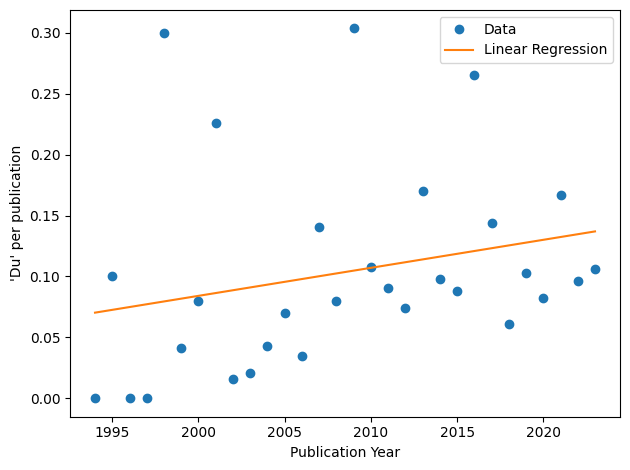

In [57]:
# Visualize the data of 'Du' per publication
# Fit a linear regression curve to the data
X = sm.add_constant(df_yearly_overview['publication_year'])
y = df_yearly_overview['du_ratio_per_article']
model = sm.OLS(y.astype(float), X.astype(float))
results = model.fit()
print(results.summary())

# Print the confidence intervals for the coefficients
conf_int = results.conf_int()
print("\nConfidence Intervals for the Coefficients:")
print(conf_int)

# Plot the data points and the linear regression curve
plt.plot(df_yearly_overview['publication_year'], y, 'o', label='Data')
plt.plot(df_yearly_overview['publication_year'], results.predict(X), label='Linear Regression')
plt.xlabel('Publication Year')
plt.ylabel('\'Du\' per publication')
plt.legend()
plt.savefig('../Visuals/count_du_per_publication.png')
plt.show()

                            OLS Regression Results                            
Dep. Variable:      du_ratio_per_word   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                 -0.028
Method:                 Least Squares   F-statistic:                    0.2236
Date:                Mon, 12 Feb 2024   Prob (F-statistic):              0.640
Time:                        18:27:36   Log-Likelihood:                 221.94
No. Observations:                  30   AIC:                            -439.9
Df Residuals:                      28   BIC:                            -437.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.0029      0.007  

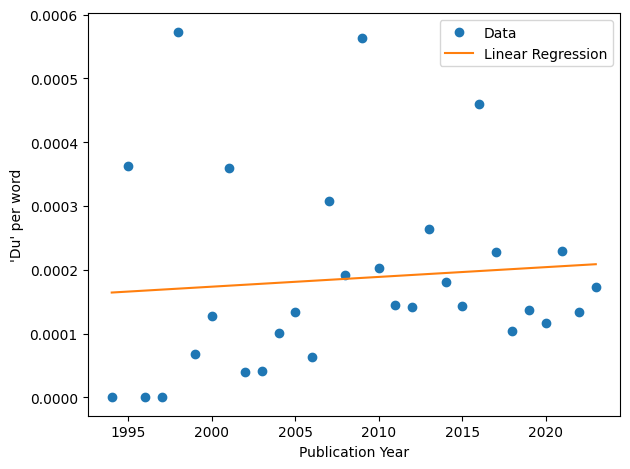

In [58]:
# Visualize the data of 'Du' per word
# Fit a linear regression curve to the data
X = sm.add_constant(df_yearly_overview['publication_year'])
y = df_yearly_overview['du_ratio_per_word']
model = sm.OLS(y.astype(float), X.astype(float))
results = model.fit()
print(results.summary())

# Print the confidence intervals for the coefficients
conf_int = results.conf_int()
print("\nConfidence Intervals for the Coefficients:")
print(conf_int)

# Plot the data points and the linear regression curve
plt.plot(df_yearly_overview['publication_year'], y, 'o', label='Data')
plt.plot(df_yearly_overview['publication_year'], results.predict(X), label='Linear Regression')
plt.xlabel('Publication Year')
plt.ylabel('\'Du\' per word')
plt.legend()
plt.savefig('../Visuals/count_du_per_word.png')
plt.show()

                              OLS Regression Results                              
Dep. Variable:     articles_with_du_ratio   R-squared:                       0.093
Model:                                OLS   Adj. R-squared:                  0.061
Method:                     Least Squares   F-statistic:                     2.873
Date:                    Mon, 12 Feb 2024   Prob (F-statistic):              0.101
Time:                            18:27:36   Log-Likelihood:                 73.720
No. Observations:                      30   AIC:                            -143.4
Df Residuals:                          28   BIC:                            -140.6
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------


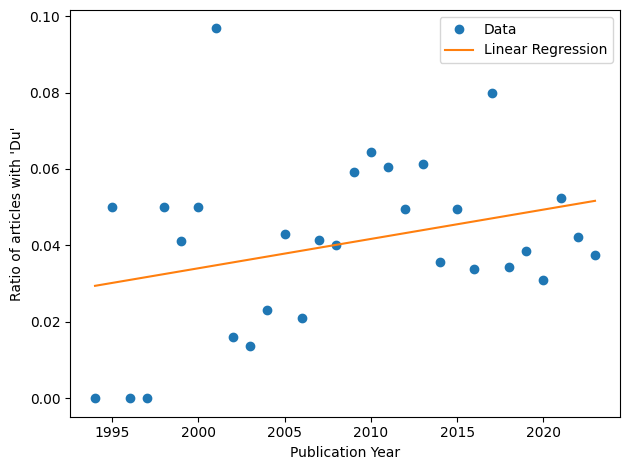

In [59]:
# Visualize the data of articles with 'Du' per publication
# Fit a linear regression curve to the data
X = sm.add_constant(df_yearly_overview['publication_year'])
y = df_yearly_overview['articles_with_du_ratio']
model = sm.OLS(y.astype(float), X.astype(float))
results = model.fit()
print(results.summary())

# Print the confidence intervals for the coefficients
conf_int = results.conf_int()
print("\nConfidence Intervals for the Coefficients:")
print(conf_int)

# Plot the data points and the linear regression curve
plt.plot(df_yearly_overview['publication_year'], y, 'o', label='Data')
plt.plot(df_yearly_overview['publication_year'], results.predict(X), label='Linear Regression')
plt.xlabel('Publication Year')
plt.ylabel('Ratio of articles with \'Du\'')
plt.legend()
plt.savefig('../Visuals/articles_with_du_ratrio.png')
plt.show()

### Overview over the usage of 'Ihr'

                              OLS Regression Results                             
Dep. Variable:     ihr_ratio_per_article   R-squared:                       0.005
Model:                               OLS   Adj. R-squared:                 -0.030
Method:                    Least Squares   F-statistic:                    0.1511
Date:                   Mon, 12 Feb 2024   Prob (F-statistic):              0.700
Time:                           18:27:36   Log-Likelihood:                -20.065
No. Observations:                     30   AIC:                             44.13
Df Residuals:                         28   BIC:                             46.93
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const     

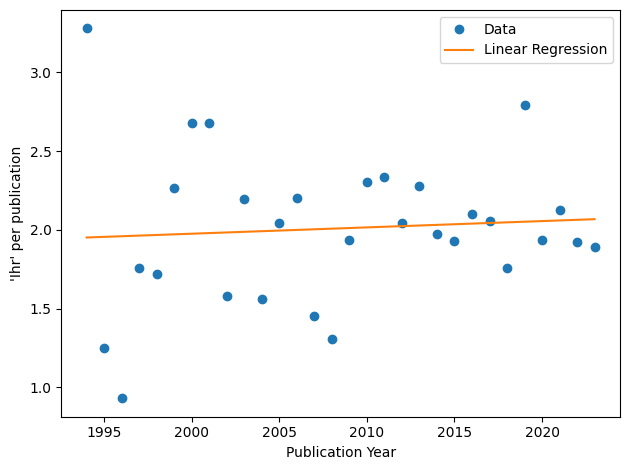

In [60]:
# Visualize the data of 'Ihr' per publication
# Fit a linear regression curve to the data
X = sm.add_constant(df_yearly_overview['publication_year'])
y = df_yearly_overview['ihr_ratio_per_article']
model = sm.OLS(y.astype(float), X.astype(float))
results = model.fit()
print(results.summary())

# Print the confidence intervals for the coefficients
conf_int = results.conf_int()
print("\nConfidence Intervals for the Coefficients:")
print(conf_int)

# Plot the data points and the linear regression curve
plt.plot(df_yearly_overview['publication_year'], y, 'o', label='Data')
plt.plot(df_yearly_overview['publication_year'], results.predict(X), label='Linear Regression')
plt.xlabel('Publication Year')
plt.ylabel('\'Ihr\' per publication')
plt.legend()
plt.savefig('../Visuals/count_ihr_per_publication.png')
plt.show()

                            OLS Regression Results                            
Dep. Variable:     ihr_ratio_per_word   R-squared:                       0.222
Model:                            OLS   Adj. R-squared:                  0.194
Method:                 Least Squares   F-statistic:                     8.002
Date:                Mon, 12 Feb 2024   Prob (F-statistic):            0.00854
Time:                        18:27:36   Log-Likelihood:                 177.55
No. Observations:                  30   AIC:                            -351.1
Df Residuals:                      28   BIC:                            -348.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0844      0.029  

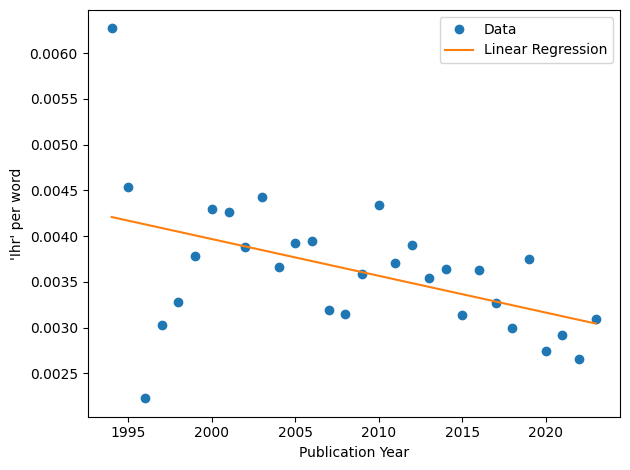

In [61]:
# Visualize the data of 'Ihr' per word
# Fit a linear regression curve to the data
X = sm.add_constant(df_yearly_overview['publication_year'])
y = df_yearly_overview['ihr_ratio_per_word']
model = sm.OLS(y.astype(float), X.astype(float))
results = model.fit()
print(results.summary())

# Print the confidence intervals for the coefficients
conf_int = results.conf_int()
print("\nConfidence Intervals for the Coefficients:")
print(conf_int)

# Plot the data points and the linear regression curve
plt.plot(df_yearly_overview['publication_year'], y, 'o', label='Data')
plt.plot(df_yearly_overview['publication_year'], results.predict(X), label='Linear Regression')
plt.xlabel('Publication Year')
plt.ylabel('\'Ihr\' per word')
plt.legend()
plt.savefig('../Visuals/count_ihr_per_word.png')
plt.show()

                               OLS Regression Results                              
Dep. Variable:     articles_with_ihr_ratio   R-squared:                       0.104
Model:                                 OLS   Adj. R-squared:                  0.072
Method:                      Least Squares   F-statistic:                     3.266
Date:                     Mon, 12 Feb 2024   Prob (F-statistic):             0.0815
Time:                             18:27:37   Log-Likelihood:                 41.340
No. Observations:                       30   AIC:                            -78.68
Df Residuals:                           28   BIC:                            -75.88
Df Model:                                1                                         
Covariance Type:                 nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------

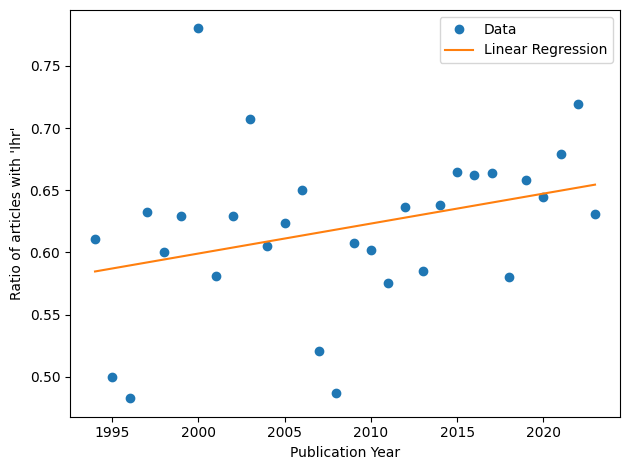

In [62]:
# Visualize the data of articles with 'Ihr' per publication
# Fit a linear regression curve to the data
X = sm.add_constant(df_yearly_overview['publication_year'])
y = df_yearly_overview['articles_with_ihr_ratio']
model = sm.OLS(y.astype(float), X.astype(float))
results = model.fit()
print(results.summary())

# Print the confidence intervals for the coefficients
conf_int = results.conf_int()
print("\nConfidence Intervals for the Coefficients:")
print(conf_int)

# Plot the data points and the linear regression curve
plt.plot(df_yearly_overview['publication_year'], y, 'o', label='Data')
plt.plot(df_yearly_overview['publication_year'], results.predict(X), label='Linear Regression')
plt.xlabel('Publication Year')
plt.ylabel('Ratio of articles with \'Ihr\'')
plt.legend()
plt.savefig('../Visuals/articles_with_ihr_ratrio.png')
plt.show()

### Overview over the usage of 'Du' / 'Ihr'

                               OLS Regression Results                               
Dep. Variable:     du_ihr_ratio_per_article   R-squared:                       0.013
Model:                                  OLS   Adj. R-squared:                 -0.023
Method:                       Least Squares   F-statistic:                    0.3593
Date:                      Mon, 12 Feb 2024   Prob (F-statistic):              0.554
Time:                              18:27:37   Log-Likelihood:                -20.680
No. Observations:                        30   AIC:                             45.36
Df Residuals:                            28   BIC:                             48.16
Df Model:                                 1                                         
Covariance Type:                  nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------

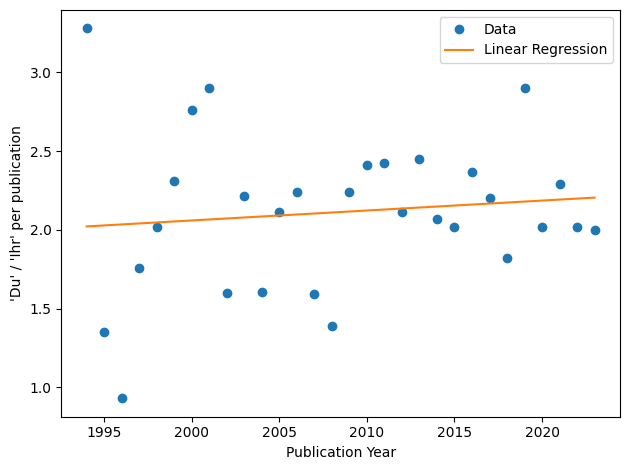

In [63]:
# Visualize the data of 'Du' and 'Ihr' per publication
# Fit a linear regression curve to the data
X = sm.add_constant(df_yearly_overview['publication_year'])
y = df_yearly_overview['du_ihr_ratio_per_article']
model = sm.OLS(y.astype(float), X.astype(float))
results = model.fit()
print(results.summary())

# Print the confidence intervals for the coefficients
conf_int = results.conf_int()
print("\nConfidence Intervals for the Coefficients:")
print(conf_int)

# Plot the data points and the linear regression curve
plt.plot(df_yearly_overview['publication_year'], y, 'o', label='Data')
plt.plot(df_yearly_overview['publication_year'], results.predict(X), label='Linear Regression')
plt.xlabel('Publication Year')
plt.ylabel('\'Du\' / \'Ihr\' per publication')
plt.legend()
plt.savefig('../Visuals/count_du_ihr_per_publication.png')
plt.show()

                              OLS Regression Results                             
Dep. Variable:     du_ihr_ratio_per_word   R-squared:                       0.202
Model:                               OLS   Adj. R-squared:                  0.174
Method:                    Least Squares   F-statistic:                     7.097
Date:                   Mon, 12 Feb 2024   Prob (F-statistic):             0.0127
Time:                           18:27:37   Log-Likelihood:                 176.92
No. Observations:                     30   AIC:                            -349.8
Df Residuals:                         28   BIC:                            -347.0
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const     

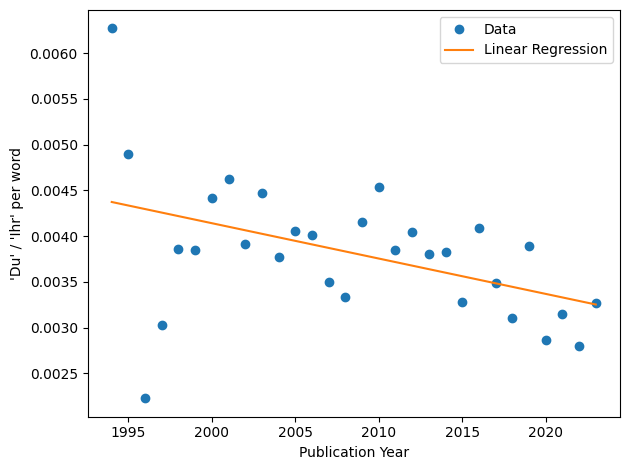

In [64]:
# Visualize the data of 'Du' and 'Ihr' per word
# Fit a linear regression curve to the data
X = sm.add_constant(df_yearly_overview['publication_year'])
y = df_yearly_overview['du_ihr_ratio_per_word']
model = sm.OLS(y.astype(float), X.astype(float))
results = model.fit()
print(results.summary())

# Print the confidence intervals for the coefficients
conf_int = results.conf_int()
print("\nConfidence Intervals for the Coefficients:")
print(conf_int)

# Plot the data points and the linear regression curve
plt.plot(df_yearly_overview['publication_year'], y, 'o', label='Data')
plt.plot(df_yearly_overview['publication_year'], results.predict(X), label='Linear Regression')
plt.xlabel('Publication Year')
plt.ylabel('\'Du\' / \'Ihr\' per word')
plt.legend()
plt.savefig('../Visuals/count_du_ihr_per_word.png')
plt.show()

                                OLS Regression Results                                
Dep. Variable:     articles_with_du_ihr_ratio   R-squared:                       0.120
Model:                                    OLS   Adj. R-squared:                  0.088
Method:                         Least Squares   F-statistic:                     3.805
Date:                        Mon, 12 Feb 2024   Prob (F-statistic):             0.0612
Time:                                18:27:37   Log-Likelihood:                 42.731
No. Observations:                          30   AIC:                            -81.46
Df Residuals:                              28   BIC:                            -78.66
Df Model:                                   1                                         
Covariance Type:                    nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------

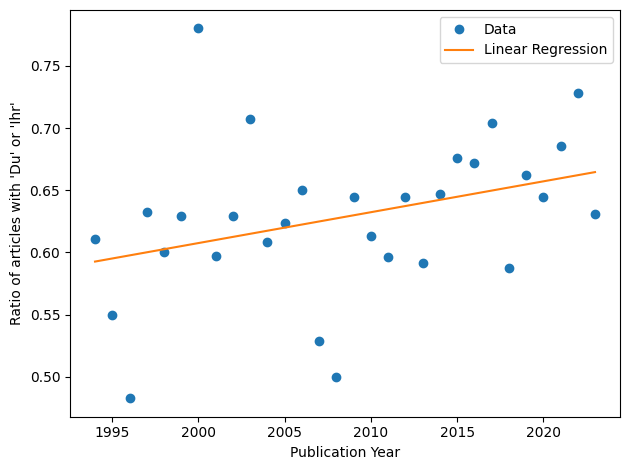

In [65]:
# Visualize the data of articles with 'Du' and 'Ihr' per publication
# Fit a linear regression curve to the data
X = sm.add_constant(df_yearly_overview['publication_year'])
y = df_yearly_overview['articles_with_du_ihr_ratio']
model = sm.OLS(y.astype(float), X.astype(float))
results = model.fit()
print(results.summary())

# Print the confidence intervals for the coefficients
conf_int = results.conf_int()
print("\nConfidence Intervals for the Coefficients:")
print(conf_int)

# Plot the data points and the linear regression curve
plt.plot(df_yearly_overview['publication_year'], y, 'o', label='Data')
plt.plot(df_yearly_overview['publication_year'], results.predict(X), label='Linear Regression')
plt.xlabel('Publication Year')
plt.ylabel('Ratio of articles with \'Du\' or \'Ihr\'')
plt.legend()
plt.savefig('../Visuals/articles_with_du_ihr_ratrio.png')
plt.show()

### Correlation Analysis

In [66]:
df.head()

,nexis_id,title,publication_date,publication_year,publisher,text,clean_text,word_count,spacy_doc,prozent_count,...,gentechnik_bool,questions_count,characters_count,questions_ratio,du_count,ihr_count,du_ihr_count,has_du,has_ihr,has_du_ihr
0,5MNMH621JB0GF09H0000000,Angst vor dem «harten Brexit» auf der Insel - ...,2017-01-15,2017,AP Deutsch,Wenn Großbritannien Ende März den Ausstieg aus...,wenn großbritannien ende märz der ausstieg aus...,763,"(Wenn, Großbritannien, Ende, März, den, Aussti...",7,...,False,1,5529,0.000181,0,5,5,False,True,True
1,5SM3THB1DXFJ50MP0000000,Fleischindustrie wehrt sich gegen Marketing fü...,2018-06-21,2018,AP Deutsch,Fleisch aus dem Labor ist noch eine Zukunftsvi...,fleisch aus der labor sein noch ein zukunftsvi...,708,"(Fleisch, aus, dem, Labor, ist, noch, eine, Zu...",0,...,False,0,5177,0.000000,0,1,1,False,True,True
2,5SM3THB1DXFJ50MY0000000,Der AP-Überblick am Nachmittag,2018-06-21,2018,AP Deutsch,Die AP Weltnachrichten haben heute unter ander...,der ap weltnachrichten haben heute unter ander...,632,"(Die, AP, Weltnachrichten, haben, heute, unter...",0,...,False,0,4622,0.000000,0,4,4,False,True,True
3,5STNVWH1DXFJ53VM0000000,Laborfleisch soll in drei Jahren auf die Telle...,2018-07-17,2018,AP Deutsch,Maastricht (AP) - Das niederländische Unterneh...,maastricht ap der niederländisch unternehmen...,225,"(Maastricht, (, AP, ), -, Das, niederländische...",0,...,False,0,1575,0.000000,0,0,0,False,False,False
4,5VHK2XG1JB0GF4Y50000000,Israelische Forscher wollen künstliche Steaks ...,2019-02-26,2019,AP Deutsch,"Die Weltbevölkerung wächst, die Nachfrage nach...",der weltbevölkerung wachsen der nachfrage nach...,631,"(Die, Weltbevölkerung, wächst, ,, die, Nachfra...",2,...,False,0,4588,0.000000,0,0,0,False,False,False


In [67]:
# Correlation between number of questions and number of 'Du' or 'Ihr' per article
df['questions_count'].corr(df['du_ihr_count'])

0.36276750889534304

In [68]:
df['du_ratio_per_word'] = df['du_count'] / df['word_count']
df['ihr_ratio_per_word'] = df['ihr_count'] / df['word_count']
df['du_ihr_ratio_per_word'] = df['du_ihr_count'] / df['word_count']

In [69]:
# Correlation between number of questions and number of 'Du' or 'Ihr' per character/word
df['questions_ratio'].corr(df['du_ihr_ratio_per_word'])

0.0286389714024189

In [70]:
# Create a new dataframe df_yearly_all that contains the data of df_yearly_overview and df_grouped
df_yearly_all = df_yearly_overview.copy()
df_yearly_all = df_yearly_all.merge(df_grouped, on='publication_year')

In [71]:
# Correlation between number of questions per character and number of 'Du' or 'Ihr' per word, aggregated by year
df_yearly_all['questions_ratio'].corr(df_yearly_all['du_ihr_ratio_per_word'].astype(float))

-0.18334378615990768